In [15]:
##########################

study_name = 'chi19s3'
study_time = 1500
min_idea_submits = 3


In [16]:
##########################

import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(study_name + '.csv', sep=';')

def filter_by_idea_submits(data, timer_value, min_idea_submits):
    column_name = str(timer_value) + '-ideaSubmitTimers'
    return data[data[column_name] >= min_idea_submits]

def get_median_requests(data, timer_value):
    column_name = str(timer_value) + '-inspirationRequestTimers'
    return statistics.median(data[column_name])   



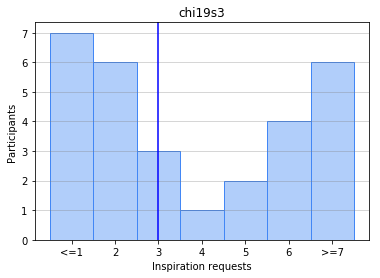

In [20]:
##########################

filtered_data = filter_by_idea_submits(data, study_time, min_idea_submits)
med = get_median_requests(filtered_data, study_time)

clipped_data = np.clip(filtered_data[str(study_time) + '-inspirationRequestTimers'], 1, 7)
plt.hist(clipped_data, bins=np.arange(8)+0.5, color = "#b1cefa", edgecolor='#4287f5')
xticks =  np.insert(np.append(np.arange(2, 7), ">=7"),0, "<=1" )
plt.title(study_name)
plt.xlabel('Inspiration requests')
plt.ylabel('Participants')
plt.xticks(np.arange(7) + 1, labels = xticks)
plt.axvline(med, color = "blue")
plt.grid(axis='y', alpha = 0.4, color = "gray")


In [18]:
##########################

def get_types(filtered_data, timer_value):
    median = get_median_requests(filtered_data, timer_value)
    column_name = str(timer_value) + '-inspirationRequestTimers'
    seekers = filtered_data[filtered_data[column_name] > median]["workerId"]
    avoiders = filtered_data[filtered_data[column_name] <= 2]["workerId"]
    return (seekers, avoiders)
    
seekers = get_types(filtered_data, study_time)[0]
avoiders = get_types(filtered_data, study_time)[1]
seekers.size


13

In [19]:
##########################

submits = pd.read_csv(study_name + '_ideaSubmits.csv', sep=';')
avoider_submits = submits[submits["workerId"].isin(avoiders)]
seeker_submits = submits[submits["workerId"].isin(seekers)]

submits = pd.read_csv(study_name + '_inspirationRequests.csv', sep=';')
avoider_requests = submits[submits["workerId"].isin(avoiders)]
seeker_requests = submits[submits["workerId"].isin(seekers)]
#seekers.size

# Get sliding-window buckets for each event array:
# Different lengths -> Fill up with zeros? Cut at smallest?
# Worker1: [[0,1,2,3],[1,2,3,4],[2,3,4,5],...]
#            ^^^^^^^^ one bucket

# in seconds
bucket_length = 50
sliding_window = 10

def get_buckets(row):
    i = 0
    result = []
    while i < row.size:
        result.append(row[i:i+sliding_window:1])
        i = i + sliding_window
    return np.asarray(result)

def get_event_data(event_table):        
    flattened_events = event_table.drop(columns = "workerId")\
        .to_numpy()\
        .flatten()
    #np.vectorize(get_buckets)(d)
    return np.array(get_buckets(flattened_events))

results = {
    "avoider_submits": get_event_data(avoider_submits),
    "avoider_requests": get_event_data(avoider_requests),
    "seeker_submits": get_event_data(seeker_submits),
    "seeker_requests": get_event_data(seeker_requests),
}
results

{'avoider_submits': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1]], dtype=int64),
 'avoider_requests': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'seeker_submits': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'seeker_requests': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)}